# Assigment 1


In [46]:
# important libararies
import matplotlib.pyplot as plt # visualization
import numpy as np # arrays
import pandas as pd # data store
import math # sqrt
import cmath # complex number

### Error functions

In [47]:
# absolute error function
def abs_err(approximate, true_value):
  return abs(approximate - true_value)

# relative error function
def rel_err(approximate, true_value):
  if true_value == 0:
    return float("inf")
  return abs_err(approximate, true_value)/ true_value

# percent error function
def per_err(approximate, true_value):
  if true_value == 0:
    return float("inf")
  return rel_err(approximate, true_value) * 100


## Task 1
Problem:
1. Plot the graph of the function $f(x)=x^3-2*x^2-5$ in the range x∈[1,4].
2. Using the graph, find the approximate value of the root.
3. Calculate the value of $f(x)$, where x is the found approximate value of the root.
4. Find the absolute error between the approximate value of the root and the true value (using any other method for the exact solution).  

Required:   
1. Plot a graph.
2. Give a detailed calculation of the absolute error.
3. Explain why the graphical root search method is only approximate.

### Explanation
The graphical method relies on visual estimation of the root where
$f(x)=0$ which can be imprecise.

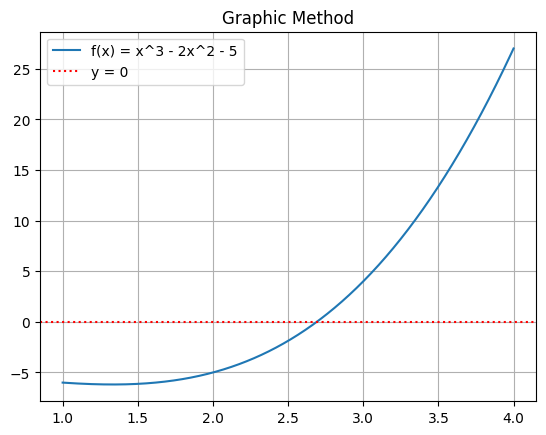


approximate root :	 2.53
exact root: 		 2.69065
abosulte error: 	 1.606500e-01


In [48]:
# function x^3 - 2x^2 - 5
def f(x: float | int):
  return x**3 - 2 * x**2 - 5

# data
x = np.linspace(1, 4, 800)
y = f(x)


plt.plot(x, y, label="f(x) = x^3 - 2x^2 - 5")
plt.axhline(0, color='red', linestyle='dotted', label="y = 0")

#show the graph
plt.title("Graphic Method")
plt.legend()
plt.grid()
plt.show()


approx_root = 2.53 # my root
true_root = 2.69065 # true root

# output information
print(f"\napproximate root :\t {approx_root}")
print(f"exact root: \t\t {true_root}")
print(f"abosulte error: \t {abs_err(approx_root, true_root):e}")

## Task 2

Problem:
1. Find the root of the equation $f(x)=e^x-2x-3$ in the interval [0,2] using the following methods:
  - Bisection method.
  - Secant method.
2. For each method, measure the number of iterations required to achieve an accuracy of $10^-6$
3. Calculate the relative error for both methods with respect to the exact value of the root.

Required:

1. Write functions for each method.
2. Print the number of iterations and the exact value of the root.
3. Explain which method is more efficient and why.

Explanation


*   The Secant Method is more efficient (fewer iterations) but requires good initial guesses.
*   The Bisection Method is robust but slower.
* In this case, the Secant Method is preferred for its faster convergence.



exact root: 		 1.92394

bisection method:
approximate root:	 1.9239387503458798
relative error:		 6.495286340444129e-07
iterations:		 100

secant method: 
approximate root:	 1.9239387503458796
relative error:		 6.495286341598243e-07
iterations:		 8


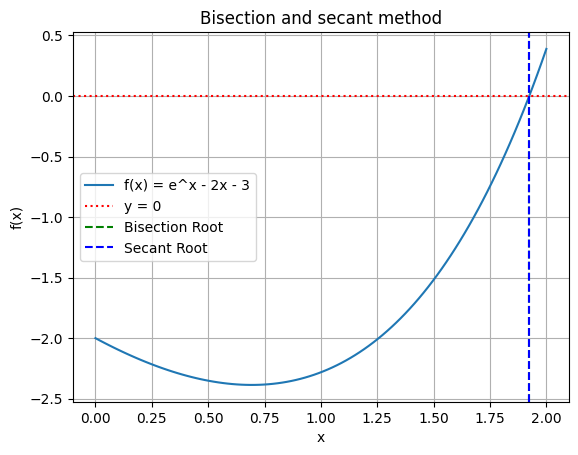

In [49]:
# given function
def f(x):
    return np.exp(x) - 2*x - 3

# bisection Method
def bisection_method(f, a, b, tol=1e-16, max_iter=100):
    if f(a) * f(b) >= 0: # require this statement
        print("Bisection method fails.")
        return None
    itr = 0
    while (b-a)/2 > tol and itr < max_iter:
        mid = (a + b) / 2
        if f(a) * f(mid) < 0:
            b = mid
        else:
            a = mid
        itr += 1

    return (a + b) / 2, itr

# Secant Method
def secant_method(f, x0, x1, tol=1e-16, max_iter=100):
    itr = 0
    while abs(x0-  x1) > tol and itr < max_iter:
        if f(x1) - f(x0) == 0:
            print("Secant method fails(")
            return None

        x_temp = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))  # Formula
        x0, x1 = x1, x_temp  # Updating values
        itr+=1
    return x1, itr

exact_root = 1.92394
appr_root_bi, iterbi = bisection_method(f, 0, 2)
appr_root_sec, itrsec = secant_method(f, 0, 2)

print(f"exact root: \t\t {exact_root}")

print("\nbisection method:")
print(f"approximate root:\t {appr_root_bi}")
print(f"relative error:\t\t {rel_err(appr_root_bi, exact_root)}")
print(f"iterations:\t\t {iterbi}")

print("\nsecant method: ")
print(f"approximate root:\t {appr_root_sec}")
print(f"relative error:\t\t {rel_err(appr_root_sec, exact_root)}")
print(f"iterations:\t\t {itrsec}")

x = np.linspace(0, 2, 100)
y = f(x)

plt.plot(x, y, label="f(x) = e^x - 2x - 3")
plt.axhline(0, color='red', linestyle='dotted', label="y = 0")
plt.axvline(appr_root_bi, color='green', linestyle='--', label='Bisection Root')
plt.axvline(appr_root_sec, color='blue', linestyle='--', label='Secant Root')


plt.title("Bisection and secant method")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

## Task 3

Problem:
1. Using the Newton-Raphson method, find the root of the equation $f(x)=x
^2−3x+2$, starting with the initial
guess $x0 = 2.5$.
2. Calculate the absolute and relative errors at each iteration step.
3. Plot a convergence graph, where the iteration number is plotted on the x-axis and the absolute error is
plotted on the y-axis.

Required:
1. Provide a table of iterations with the current guess, absolute and relative errors.
2. Explain how the choice of the initial guess affects the convergence of the method

Explanation:
* Newton-Raphson Efficiency:

 * The method converges quadratically when the initial guess is close to the root, requiring fewer iterations compared to methods like Bisection.

* Limitations:

  * It requires the derivative $f`(x)$
  * It may fail to converge if the derivative is zero or if the function is not well-behaved near the root.

Table of iteratioin:
   Iteration       x_n       Abs err       Rel err
0          1  1.400000  1.200000e+00  6.000000e+00
1          2  0.200000  5.538462e-01  7.346939e-01
2          3  0.753846  2.055511e-01  2.142503e-01
3          4  0.959397  3.907794e-02  3.913761e-02
4          5  0.998475  1.522442e-03  1.522446e-03
5          6  0.999998  2.317820e-06  2.317820e-06
6          7  1.000000  5.372147e-12  5.372147e-12


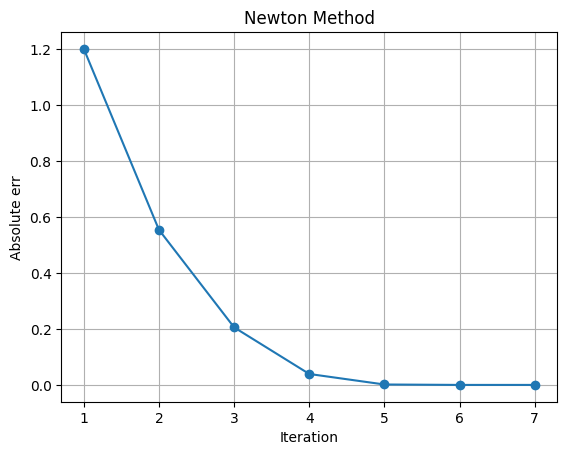

In [50]:
def f(x):
    return x**2 - 3*x + 2

def f_prime(x):
    return 2*x - 3

# Newton_raphson
def newton_raphson(f, f_prime, x0, tolerance=1e-6, max_iter=100):
    data = []
    x_n = x0
    for i in range(max_iter):
        # initalize x_n+1
        if f_prime(x_n) == 0:
          print("Derivitave is equal to zero")
          return None
        x_next = x_n - f(x_n) / f_prime(x_n)
        absolute_error = abs(x_next - x_n)
        relative_error = absolute_error / abs(x_next) if x_next != 0 else float('inf')

        # store data for table
        data.append({
            "Iteration": i + 1,
            "x_n": x_n,
            "Abs err": absolute_error,
            "Rel err": relative_error
        })

        # chechk for min difference between past and now x point
        if absolute_error < tolerance:
            break
        x_n = x_next
    return x_n, data


x0 = 1.4

root, data = newton_raphson(f, f_prime, x0)

df_iterations = pd.DataFrame(data)

print("Table of iteratioin:")
print(df_iterations)


plt.plot(df_iterations["Iteration"], df_iterations["Abs err"], marker='o')
plt.xlabel('Iteration')
plt.ylabel('Absolute err')
plt.title('Newton Method')
plt.grid()
plt.show()


## Task 4

Problem:
1. Find one of the roots (including complex roots) for the function $f(x)=x^3+x^2+x+1$ using Muller's method,
starting with the initial approximations x0=-1, x1=0, x2=1.
2. Check the result by substituting the found root value into the function.
3. Calculate the absolute error between the calculated value of f(x) and 0.

Required:
1. Explain how Muller's method handles complex roots.
2. Provide an interpretation of the result.

Explanation:
* its like Secant Method, but parabola
* good for complexs root
* by finding discriminant we can reach complex number

zero
Iteration table:
   Iteration  x0  x1  x2  x3 (approximation)     f(x3)  Absolute error
0          1  -1   0   1           -1.0+0.0j  0.0+0.0j             2.0

Found root: (-1+0j)
f(x_root): 0j
Absolute error: 0.0


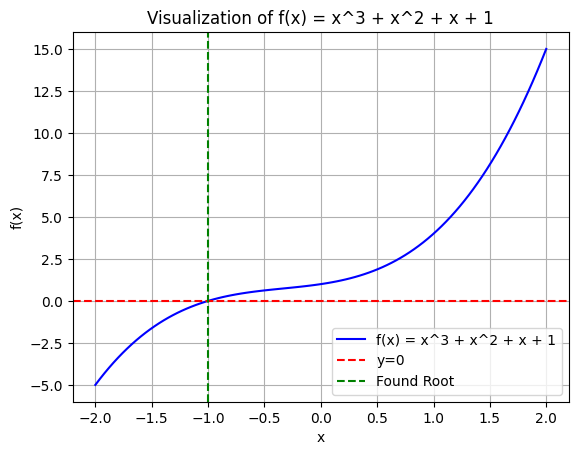

In [51]:
# given function
def f(x):
    return x**3 + x**2 + x + 1

# Muller's method implementation
def mullers_method(f, x0, x1, x2, tol=1e-6, max_iter=100):
    data = []

    for i in range(max_iter):
        # Calculate function values at the points
        f0, f1, f2 = f(x0), f(x1), f(x2)

        # Calculate differences
        h0, h1 = x1 - x0, x2 - x1
        delta0, delta1 = (f1 - f0) / h0, (f2 - f1) / h1

        a = (delta1 - delta0) / (h1 + h0)
        b = a * h1 + delta1
        c = f2

        # Compute the discriminant (complex number)
        discriminant = cmath.sqrt(b**2 - 4 * a * c)

        # Choose the root closer to the denominator for better numerical stability
        if abs(b + discriminant) > abs(b - discriminant):
            denominator = b + discriminant
        else:
            denominator = b - discriminant


        if denominator == 0:
            print("zero")
            break
        dx = (-2 * c) / denominator
        x3 = x2 + dx

        # Store iteration details
        data.append({
            "Iteration": i + 1,
            "x0": x0,
            "x1": x1,
            "x2": x2,
            "x3 (approximation)": x3,
            "f(x3)": f(x3),
            "Absolute error": abs(dx)
        })

        if abs(dx) < tol:
            break

        # Update points
        x0, x1, x2 = x1, x2, x3

    return x3, data


x0, x1, x2 = -1, 0, 1

root, iterations = mullers_method(f, x0, x1, x2)
df_iterations = pd.DataFrame(iterations)


print("Iteration table:")
print(df_iterations)

f_root = f(root)

# Print the results
print("\nFound root:", root)
print("f(x_root):", f_root)
print("Absolute error:", abs(f_root))

x_vals = np.linspace(-2, 2, 100)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label="f(x) = x^3 + x^2 + x + 1", color='blue')
plt.axhline(0, color='red', linestyle='--', label='y=0')
plt.axvline(root.real, color='green', linestyle='--', label='Found Root')

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Visualization of f(x) = x^3 + x^2 + x + 1")
plt.legend()
plt.grid()
plt.show()

## Task 5


Problem:
1. Find the root of the equation $f(x)=x^2-2^x$
x using the False position method.
2. Calculate the absolute and relative errors after each iteration.
3. Plot a graph of the absolute error as a function of the iteration number.

Required:
1. Explain why the false position method converges more slowly than the Newton-Raphson method.

Explain:
* The Newton-Raphson Method uses the derivative to make quadratic approximations, converging much faster (quadratically). The False Position Method only uses function values, achieving linear convergence.

Iteration table:
    Iteration  a         b  c (approximation)  Absolute error  Relative error
0           1 -3  0.000000          -0.303797    7.178243e-01        2.362838
1           2 -3 -0.303797          -0.505552    4.488074e-01        0.887756
2           3 -3 -0.505552          -0.625624    2.567336e-01        0.410364
3           4 -3 -0.625624          -0.692378    1.394448e-01        0.201400
4           5 -3 -0.692378          -0.728075    7.361538e-02        0.101110
5           6 -3 -0.728075          -0.746765    3.828027e-02        0.051261
6           7 -3 -0.746765          -0.756442    1.974967e-02        0.026109
7           8 -3 -0.756442          -0.761424    1.014791e-02        0.013328
8           9 -3 -0.761424          -0.763980    5.203360e-03        0.006811
9          10 -3 -0.763980          -0.765291    2.665170e-03        0.003483
10         11 -3 -0.765291          -0.765961    1.364353e-03        0.001781
11         12 -3 -0.765961          -0.766305  

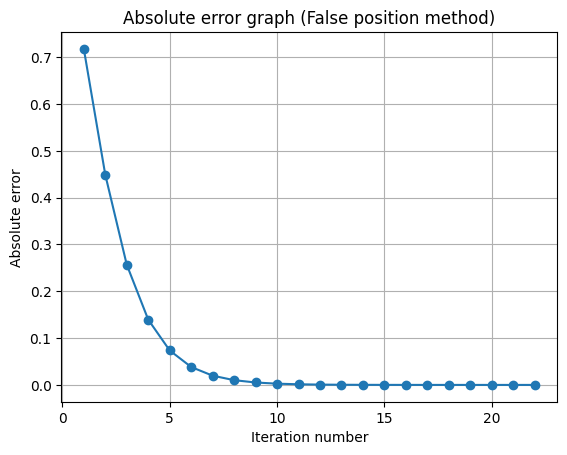

In [52]:
# given function
def f(x):
    return x**2 - 2**x

# False position method
def false_position_method(f, a, b, tolerance=1e-6, max_iter=100):
    iterations = []
    if f(a) * f(b) >= 0:
        print("f(a) and f(b) must have opposite signs")
        return

    for i in range(max_iter):
        # Calculate the new approximation of the root
        c = b - (f(b) * (b - a)) / (f(b) - f(a))
        f_c = f(c)

        # Calculate errors
        absolute_error = abs(f_c)
        relative_error = absolute_error / abs(c) if c != 0 else float('inf')

        # Store iteration data
        iterations.append({
            "Iteration": i + 1,
            "a": a,
            "b": b,
            "c (approximation)": c,
            "Absolute error": absolute_error,
            "Relative error": relative_error
        })

        # stop condition
        if abs(f_c) < tolerance:
            break

        if f(a) * f_c < 0:
            b = c
        else:
            a = c

    return c, iterations


a, b = -3, 0

# Run the fpm
root, iterations = false_position_method(f, a, b)
df_iterations = pd.DataFrame(iterations)


print("Iteration table:")
print(df_iterations)

# Plot the absolute error graph
plt.plot(df_iterations["Iteration"], df_iterations["Absolute error"], marker='o')
plt.xlabel("Iteration number")
plt.ylabel("Absolute error")
plt.title("Absolute error graph (False position method)")
plt.grid()
plt.show()

## Task 6

Problem:
1. Solve the equation $f(x)=x^2−6x+5$ using the iteration method. Transform the equation into the form
$x=g(x)$.
2. Perform 10 iterations, starting with the initial value x0=0.5.
3. Find the absolute error at each iteration, comparing the result with the true root.

Required:
1. Explain how the choice of function g(x) affects convergence.

Explain:
* Just divide one x from function, will look like inverse of f(x)

Iteration table:
   Iteration  x_current    x_next  Absolute error
0          1   0.500000  0.875000        0.125000
1          2   0.875000  0.960938        0.039062
2          3   0.960938  0.987233        0.012767
3          4   0.987233  0.995772        0.004228
4          5   0.995772  0.998594        0.001406
5          6   0.998594  0.999532        0.000468
6          7   0.999532  0.999844        0.000156
7          8   0.999844  0.999948        0.000052
8          9   0.999948  0.999983        0.000017
9         10   0.999983  0.999994        0.000006


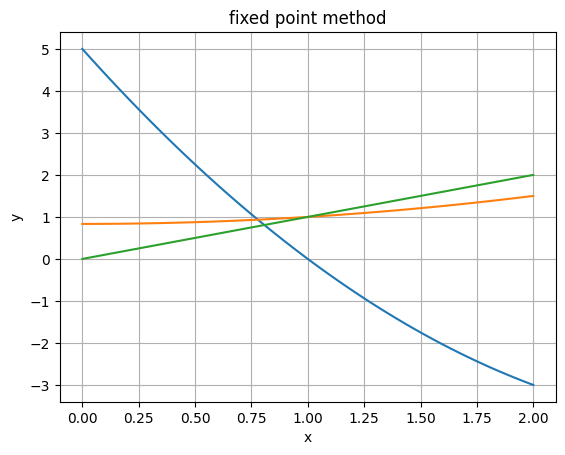

In [54]:
# Define the transformation g(x)
def g(x):
    return (x**2 + 5) / 6

# Define the original function for reference
def f(x):
    return x**2 - 6*x + 5

# Iteration method
def iteration_method(g, true_root, x0, num_iterations=10):
    iterations = []

    x_current = x0
    for i in range(num_iterations):
        x_next = g(x_current)
        absolute_error = abs(x_next - true_root)

        iterations.append({
            "Iteration": i + 1,
            "x_current": x_current,
            "x_next": x_next,
            "Absolute error": absolute_error
        })

        x_current = x_next

    return iterations

# Problem parameters
x0 = 0.5
true_root = 1

# Perform the iteration
iterations = iteration_method(g, true_root, x0)

# Convert results to a pandas DataFrame
df_iterations = pd.DataFrame(iterations)

# Display the table
print("Iteration table:")
print(df_iterations)

x = np.linspace(0, 2, 50)
y = f(x)
g = g(x)

plt.plot(x, y, x, g, x, x)
plt.xlabel("x")
plt.ylabel("y")
plt.title("fixed point method")
plt.grid()
plt.show()

